In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Función para dibujar el grafo y la ruta
def draw_graph(graph, path=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    
    # Dibujar nodos
    nx.draw_networkx_nodes(graph, pos, node_color='w', edgecolors='k', node_size=500)
    
    # Dibujar etiquetas de nodos
    labels = {node: str(node) for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels, font_size=12)
    
    # Dibujar aristas
    nx.draw_networkx_edges(graph, pos, edge_color='k', width=2)
    
    # Dibujar ruta si existe
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='b', width=4)
    
    plt.axis('off')
    plt.show()

In [5]:
# Función principal del algoritmo de Dijkstra
def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}  # Distancias iniciales
    distances[start] = 0
    
    visited = {node: False for node in graph}  # Nodos visitados
    
    previous = {node: None for node in graph}  # Nodos previos en el camino
    
    current_node = start
    
    while current_node:
        for neighbor in graph[current_node]:
            distance = distances[current_node] + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
        
        visited[current_node] = True
        
        draw_graph(graph, path=list(nx.shortest_path(graph, start, current_node)))  # Dibujar el grafo en cada iteración
        
        current_node = min_distance(distances, visited)
    
    # Reconstruir el camino
    path = []
    current_node = end
    while current_node:
        path.insert(0, current_node)
        current_node = previous[current_node]
    
    return path

In [9]:
graph = nx.Graph()

graph.add_edge('A', 'B', weight=3)
graph.add_edge('A', 'C', weight=2)
graph.add_edge('A', 'D', weight=5)


In [10]:
graph.add_edge('B', 'E', weight=4)
graph.add_edge('B', 'F', weight=2)
graph.add_edge('C', 'G', weight=1)
graph.add_edge('C', 'H', weight=6)


In [11]:
graph.add_edge('D', 'I', weight=3)
graph.add_edge('D', 'J', weight=5)
graph.add_edge('E', 'F', weight=1)


In [12]:
graph.add_edge('F', 'K', weight=4)
graph.add_edge('G', 'L', weight=1)
graph.add_edge('H', 'M', weight=2)


In [13]:
graph.add_edge('I', 'J', weight=4)
graph.add_edge('J', 'N', weight=3)
graph.add_edge('K', 'F', weight=2)


In [14]:
graph.add_edge('L', 'G', weight=1)
graph.add_edge('M', 'H', weight=4)
graph.add_edge('N', 'J', weight=2)


In [15]:
def draw_graph(graph, path=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    
    nx.draw_networkx_nodes(graph, pos, node_color='w', edgecolors='k', node_size=500)
    
    labels = {node: str(node) for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels, font_size=12)
    
    nx.draw_networkx_edges(graph, pos, edge_color='k', width=2)
    
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='b', width=4)
    
    plt.axis('off')
    plt.show()


In [16]:
def min_distance(distances, visited):
    min_dist = float('inf')
    min_node = None
    
    for node in distances:
        if not visited[node] and distances[node] < min_dist:
            min_dist = distances[node]
            min_node = node
            
    return min_node


In [18]:
def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    visited = {node: False for node in graph}
    
    previous = {node: None for node in graph}
    
    current_node = start
    
    while current_node:
        for neighbor in graph[current_node]:
            distance = distances[current_node] + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
        
        visited[current_node] = True
        
        draw_graph(graph, path=list(nx.shortest_path(graph, start, current_node)))
        
        current_node = min_distance(distances, visited)
    
    path = []
    current_node = end
    while current_node:
        path.insert(0, current_node)
        current_node = previous[current_node]
    
    return path



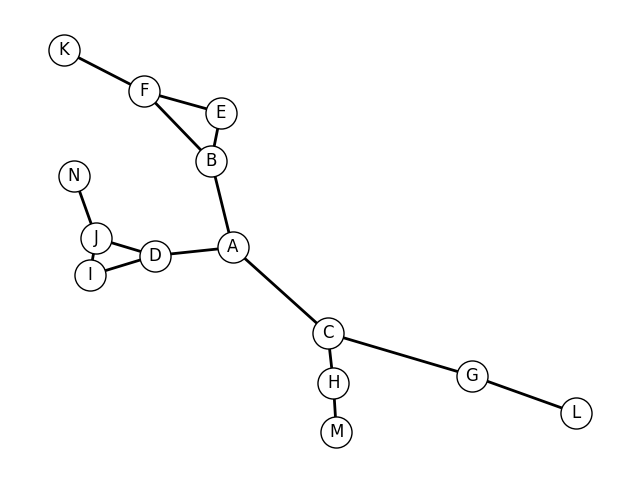

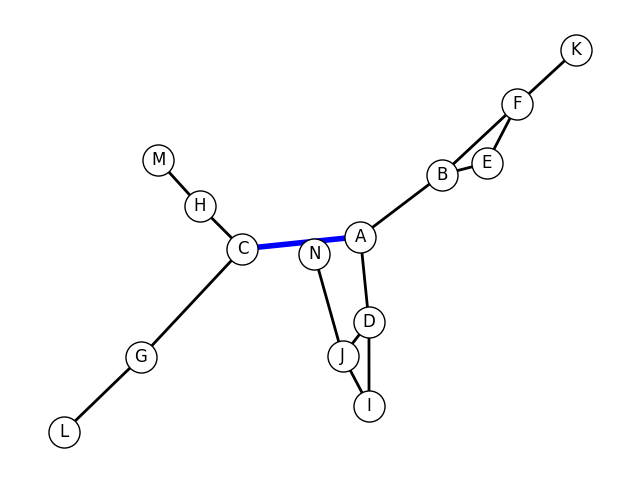

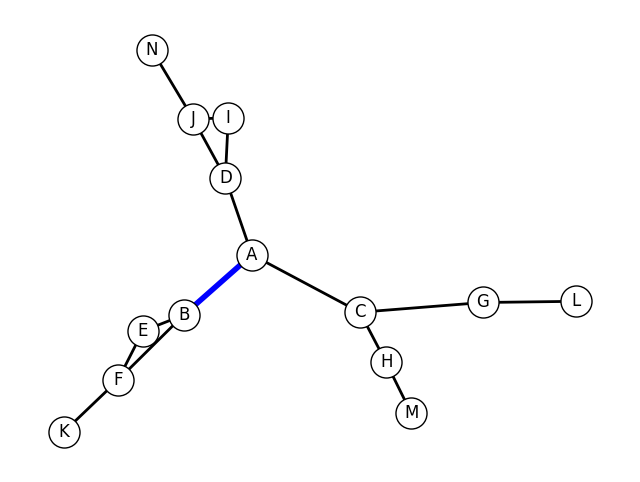

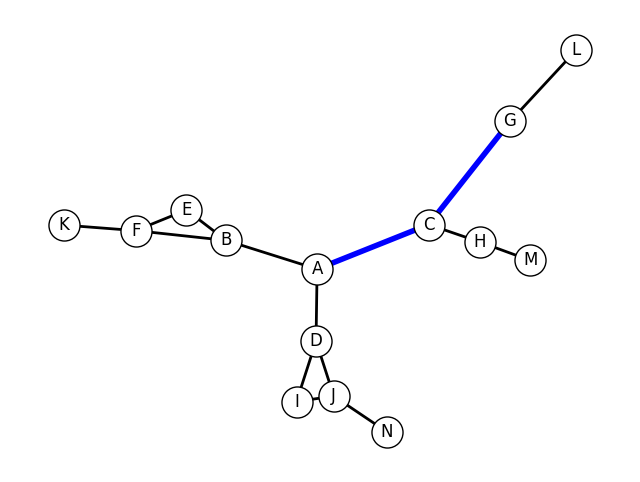

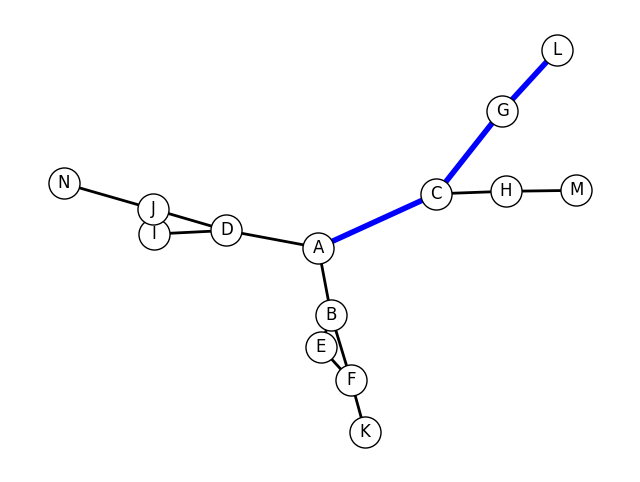

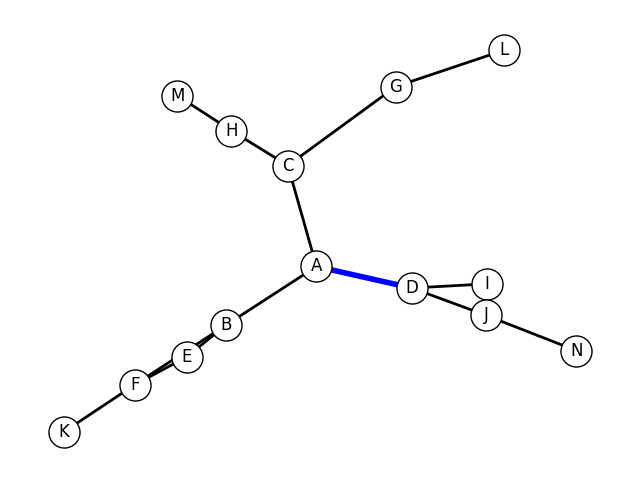

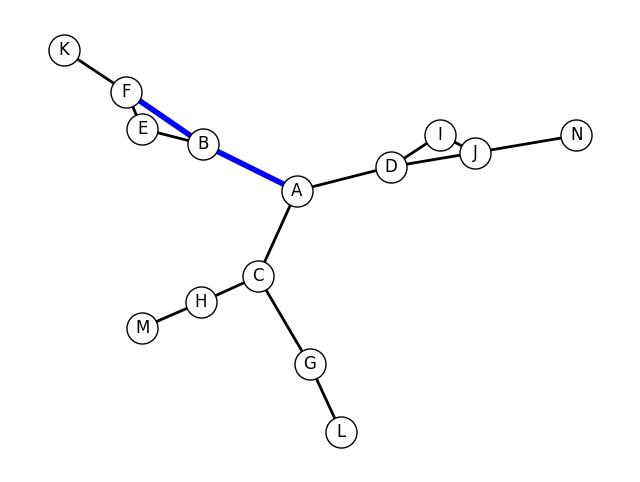

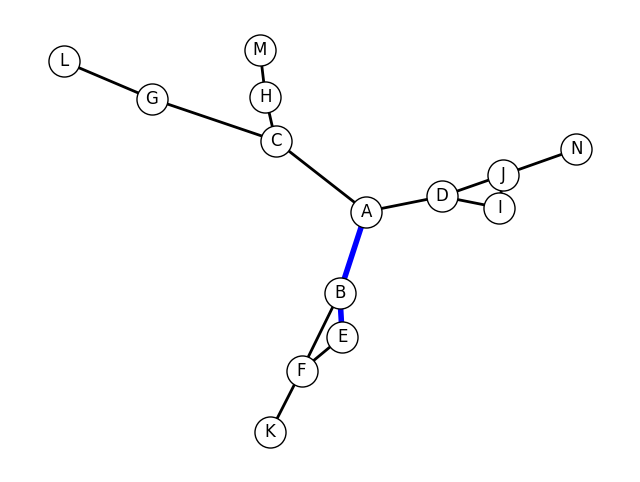

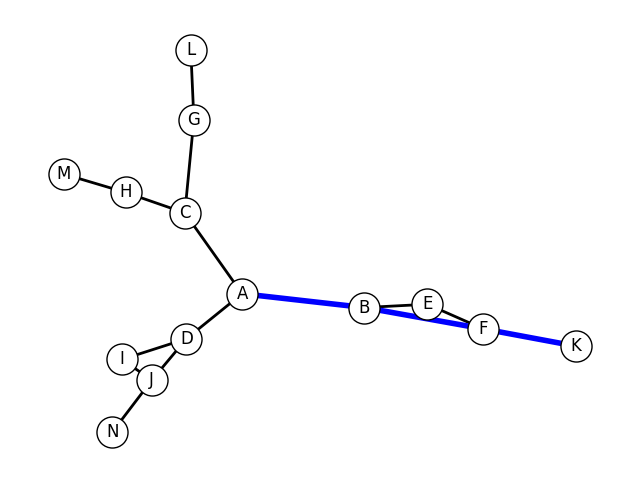

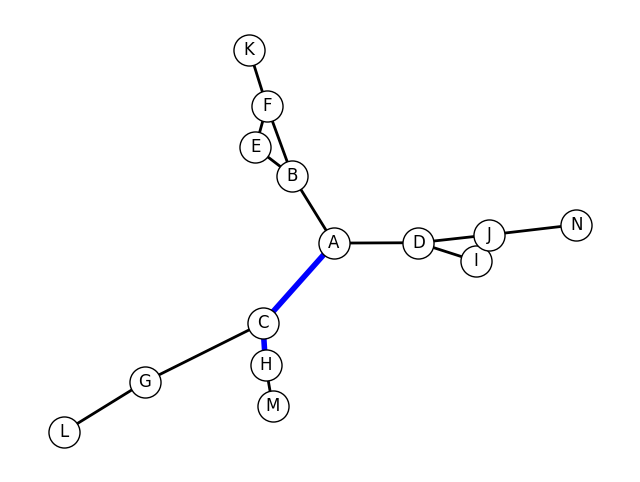

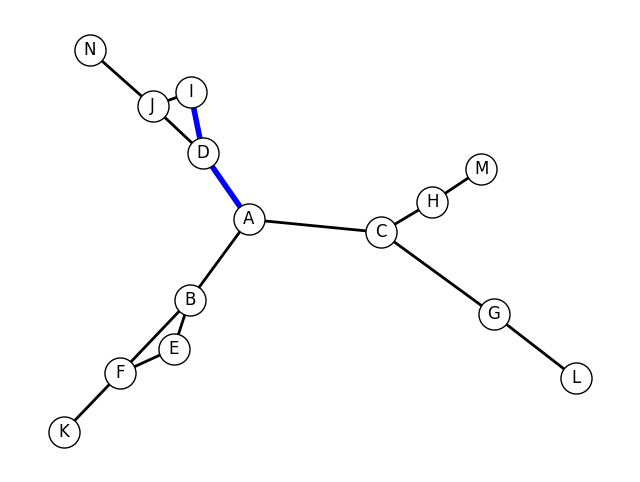

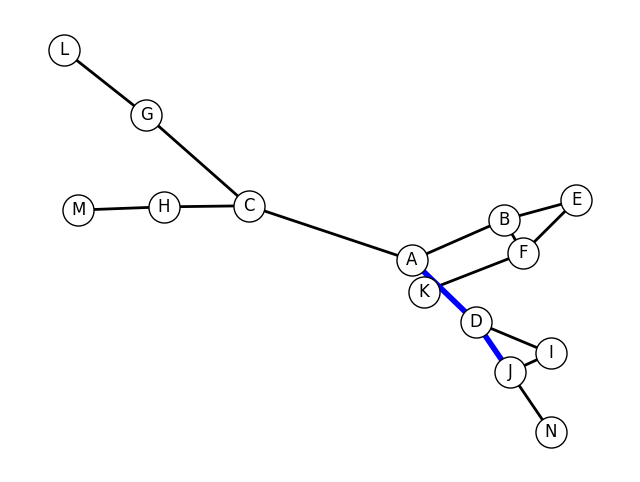

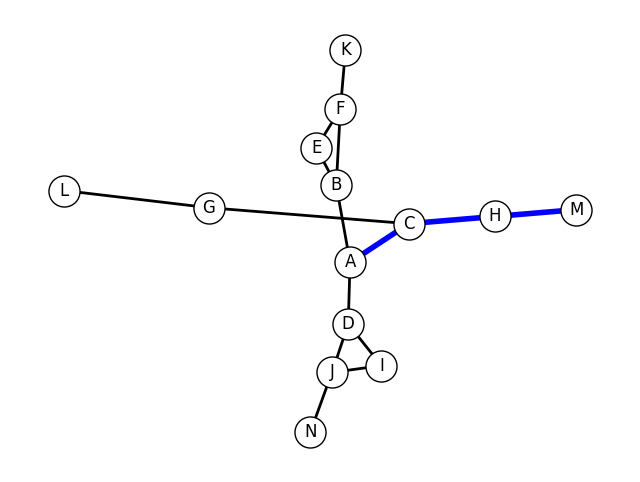

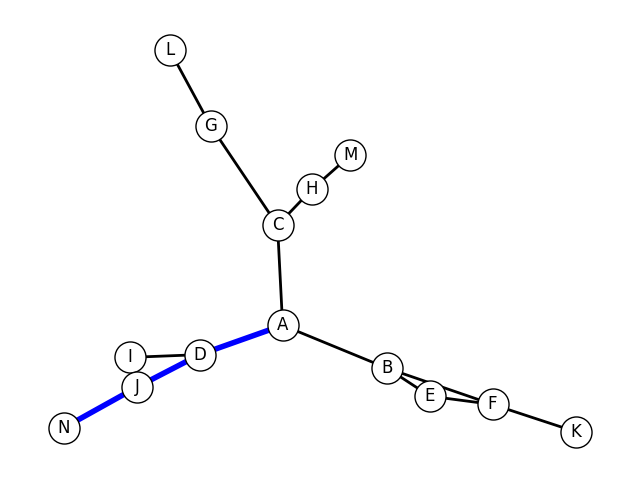

Ruta encontrada: ['A', 'D', 'J', 'N']


In [19]:
start_node = 'A'
end_node = 'N'

path = dijkstra(graph, start_node, end_node)

if path:
    print("Ruta encontrada:", path)
else:
    print("No se encontró una ruta válida.")
